# Problem Statement
Access to safe drinking-water is essential to health, a basic human right and a component of effective policy for health protection. This is important as a health and development issue at a national, regional and local level. In some regions, it has been shown that investments in water supply and sanitation can yield a net economic benefit, since the reductions in adverse health effects and health care costs outweigh the costs of undertaking the interventions### 

Content - The water_potabiIity.csv file contains water quality metrics for 3276 different water bodies.

1.	pH value: PH is an important parameter in evaluating the acid—base balance of water. It is also the indicator of acidic or alkaline condition of water status. WHO has recommended maximum permissible limit of pH from 6.5 to 8.5. The current investigation ranges were 6.52—6.83 which are in the range of WHO standards.
2.	Hardness: Hardness is mainly caused by calcium and magnesium salts. These salts are dissolved from geologic deposits through which water travels. The length of time water is in contact with hardness producing material helps determine how much hardness there is in raw water. Hardness was originally defined as the capacity of water to precipitate soap caused by Calcium and Magnesium.
3.	Solids (Total dissolved solids - TDS): Water has the ability to dissolve a wide range of inorganic and some organic minerals or salts such as potassium, calcium, sodium, bicarbonates, chlorides, magnesium, sulfates etc. These minerals produced un-wanted taste and diluted color in appearance of water. This is the important parameter for the use of water. The water with high TDS value indicates that water is highly mineralized. Desirable limit for TDS is 500 mg/I and maximum limit is 1000 mg/I which prescribed for drinking purpose.
4.	Chloramines: Chlorine and chloramine are the major disinfectants used in public water systems. Chloramines are most commonly formed when ammonia is added to chlorine to treat drinking water. Chlorine levels up to 4 milligrams per liter (mg/L or 4 parts per million (ppm)) are considered safe in drinking water.
5.	Sulfate: Sulfates are naturally occurring substances that are found in minerals, soil, and rocks. They are present in ambient air, groundwater, plants, and food. The principal commercial use of sulfate is in the chemical industry. Sulfate concentration in seawater is about 2,700 milligrams per liter (mg/L). It ranges from 3 to 30 mg/L in most freshwater supplies, although much higher concentrations (1000 mg/L) are found in some geographic locations.
6.	Conductivity: Pure water is not a good conductor of electric current rather’s a good insulator. Increase in ions concentration enhances the electrical conductivity of water. Generally, the amount of dissolved solids in water determines the electrical conductivity. Electrical conductivity (EC) actually measures the ionic process of a solution that enables it to transmit current. According to WHO standards, EC value should not exceeded 400 pS/cm.
7.	Organic_carbon: Total Organic Carbon (TOC) in source waters comes from decaying natural organic matter (NOM) as well as synthetic sources. TOC is a measure of the total amount of carbon in organic compounds in pure water. According to US EPA < 2 mg/L as TOC in treated / drinking water, and < 4 mg/Lit in source water which is use for treatment.
 
8.	Trihalomethanes: THMs are chemicals which may be found in water treated with chlorine. The concentration of THMs in drinking water varies according to the level of organic material in the water, the amount of chlorine required to treat the water, and the temperature of the water that is being treated. THM levels up to 80 ppm is considered safe in drinking water.
9.	Turbidity: The turbidity of water depends on the quantity of solid matter present in the suspended state. It is a measure of light emitting properties of water and the test is used to indicate the quality of waste discharge with respect to colloidal matter. The mean turbidity value obtained for Wondo Genet Campus (0.98 NTU) is lower than the WHO recommended value of 5.00 NTU.
10.	Potability: Indicates if water is safe for human consumption where 1 means Potable and 0 means###  Not potable.

Task 1

•	Predict if water is safe for human consumption or not.

1.	ph: pH of 1. water (0 to 14).
2.	Hardness: Capacity of water to precipitate soap in mg/L.
3.	Solids: Total dissolved solids in ppm.
4.	Chloramines: Amount of Chloramines in ppm.
5.	Sulfate: Amount of Sulfates dissolved in mg/L.
6.	Conductivity: Electrical conductivity of water in pS/cm.
7.	Organic carbon: Amount of organic carbon in ppm.
8.	Trihalomethanes: Amount of Trihalomethanes in pg/L.
9.	Turbidity: Measure of light emiting property of water in NTU.
10.	Potability: Indicates if water is safe for human consumption. otable -1 and Not potable -0 


# Steps:
## Import relavant libraries & modules
- **Basic EDA**
  - Imbalance Data
  - Missing Data
  - Duplicate Data
  - Outliers & Anomalies
  - Data Visualization
  - Feature Encoding
  - Feature Selection
- **Model Building**
  - Separate Independent & Dependent Data
  - Split data into Training & Test set
  - Model Selection
  - Model Prediction
  - Model Evalution
  - Hyperparameter Tuning

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier, AdaBoostClassifier

import xgboost
from xgboost import XGBClassifier

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('water_potability.csv')
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [3]:
df.shape

(3276, 10)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


## Imbalance Data checking

In [5]:
df['Potability'].value_counts()

Potability
0    1998
1    1278
Name: count, dtype: int64

In [6]:
len(df[df['Potability']==0]) / len(df['Potability'])

0.6098901098901099

In [7]:
len(df[df['Potability']==1]) / len(df['Potability'])

0.3901098901098901

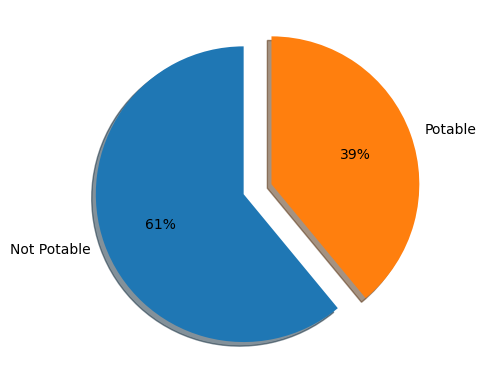

In [8]:
plt.pie(df['Potability'].value_counts(),autopct='%1.0f%%',shadow=True,startangle=90,explode=(0,0.2),labels=['Not Potable','Potable'])
plt.show()

# This is not imbalance almost balanced data

In [9]:
df.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


## Missing data

In [10]:
df.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [11]:
df.isnull().mean()*100

ph                 14.987790
Hardness            0.000000
Solids              0.000000
Chloramines         0.000000
Sulfate            23.840049
Conductivity        0.000000
Organic_carbon      0.000000
Trihalomethanes     4.945055
Turbidity           0.000000
Potability          0.000000
dtype: float64

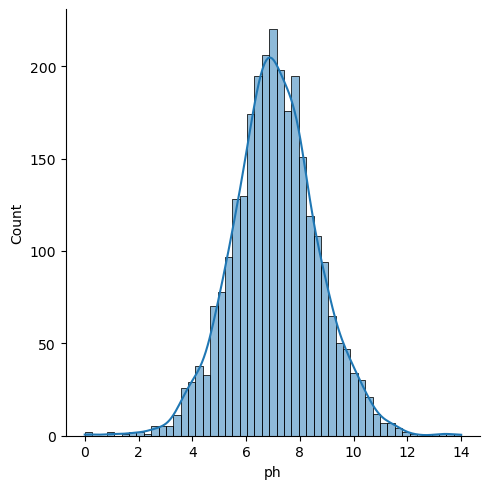

In [12]:
sns.displot(df['ph'],kde=True)  # Normal Distribution - fill the missing value with mean value

In [13]:
df['ph'].skew()

0.025630447632210205

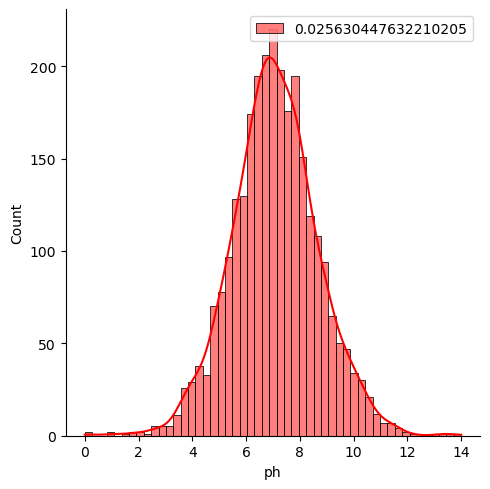

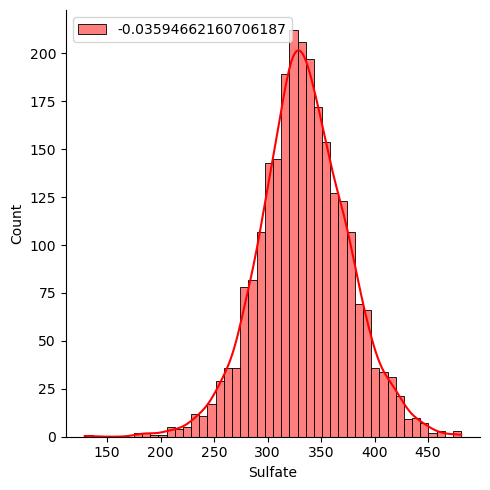

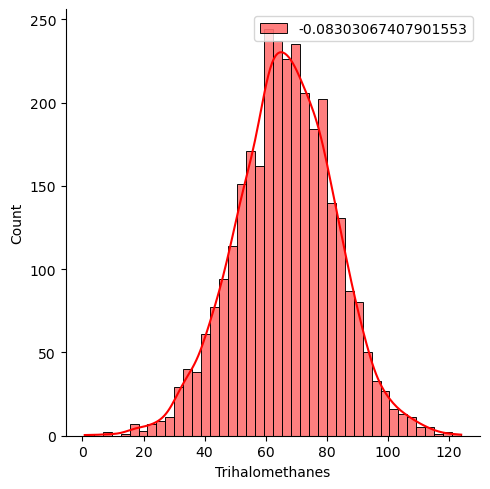

In [14]:
for i in df:
    if df[i].isnull().sum() > 0:
        sns.displot(df[i],kde=True,label=f'{df[i].skew()}',color='r')
        plt.legend()
        plt.show()

In [15]:
# almost all are in normal distribution so fill the missing values with their mean value
for i in df:
    if df[i].isnull().sum() > 0:
        print(f'{i} : {df[i].mean()}')
        df[i].fillna(df[i].mean(),inplace=True)

ph : 7.080794504276835
Sulfate : 333.7757766108135
Trihalomethanes : 66.39629294676803


In [16]:
df.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

In [17]:
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,7.080795,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,333.775777,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,333.775777,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


## Duplicate Data

In [18]:
df.duplicated().sum()

0

## Outlier detection and treatment

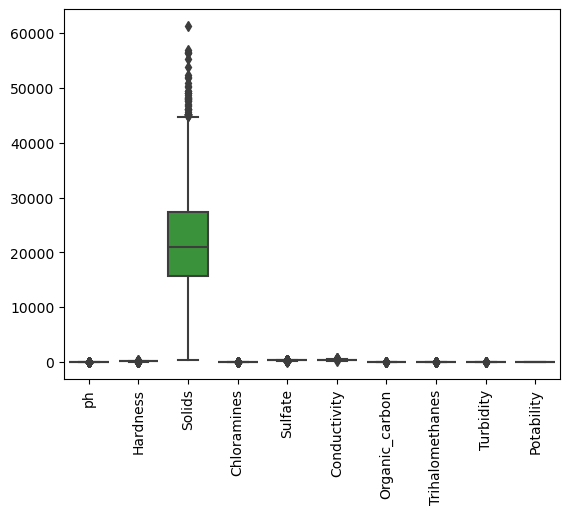

In [19]:
# Before Treating Outliers
sns.boxplot(df)
plt.xticks(rotation=90)
plt.show()

### Using IQR - Inter Quartile Range

In [20]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
IQR

ph                     1.592377
Hardness              39.816918
Solids             11666.071830
Chloramines            1.987466
Sulfate               33.291119
Conductivity         116.057890
Organic_carbon         4.491850
Trihalomethanes       20.018954
Turbidity              1.060609
Potability             1.000000
dtype: float64

### Checking Lower Limit & Upper Limit

In [21]:
print(Q1 - 1.5*IQR)
print()
print(Q3 + 1.5*IQR)

ph                    3.889107
Hardness            117.125160
Solids            -1832.417449
Chloramines           3.146221
Sulfate             267.157960
Conductivity        191.647579
Organic_carbon        5.328026
Trihalomethanes      26.619225
Turbidity             1.848797
Potability           -1.500000
dtype: float64

ph                    10.258615
Hardness             276.392834
Solids             44831.869873
Chloramines           11.096086
Sulfate              400.322434
Conductivity         655.879140
Organic_carbon        23.295427
Trihalomethanes      106.695040
Turbidity              6.091233
Potability             2.500000
dtype: float64


In [22]:
lower_quartile = (Q1 - 1.5*IQR)
upper_quartile = (Q3 + 1.5*IQR)

In [23]:
df.shape

(3276, 10)

In [24]:
data = df[~((df < lower_quartile) | (df > upper_quartile)).any(axis=1)]
data

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,7.080795,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
2,8.099124,224.236259,19909.541732,9.275884,333.775777,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
5,5.584087,188.313324,28748.687739,7.544869,326.678363,280.467916,8.399735,54.917862,2.559708,0
...,...,...,...,...,...,...,...,...,...,...
3270,6.069616,186.659040,26138.780191,7.747547,345.700257,415.886955,12.067620,60.419921,3.669712,1
3272,7.808856,193.553212,17329.802160,8.061362,333.775777,392.449580,19.903225,66.396293,2.798243,1
3273,9.419510,175.762646,33155.578218,7.350233,333.775777,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.869376,6.303357,333.775777,402.883113,11.168946,77.488213,4.708658,1


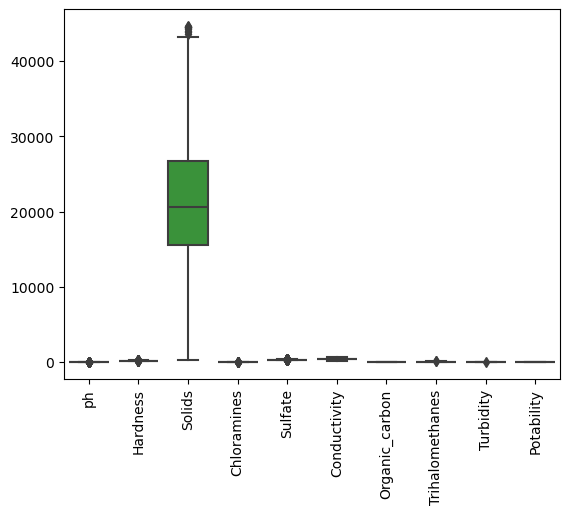

In [25]:
# After treating Outliers
sns.boxplot(data)
plt.xticks(rotation=90)
plt.show()

## Feature Selection

In [26]:
data.corr()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
ph,1.000000,0.131362,-0.087036,-0.062888,0.016894,0.001943,0.026160,0.009172,-0.043034,-0.005949
Hardness,0.131362,1.000000,-0.045552,-0.035832,-0.027939,-0.030415,0.012463,-0.007093,-0.022362,-0.000710
Solids,-0.087036,-0.045552,1.000000,-0.040392,-0.110090,0.007087,0.026793,-0.024550,0.022801,0.005600
Chloramines,-0.062888,-0.035832,-0.040392,1.000000,0.024502,-0.015277,-0.000684,0.016574,-0.005415,0.013195
Sulfate,0.016894,-0.027939,-0.110090,0.024502,1.000000,-0.005850,-0.007588,-0.022269,-0.017310,-0.003741
Conductivity,0.001943,-0.030415,0.007087,-0.015277,-0.005850,1.000000,0.006515,-0.001138,0.007674,-0.001886
Organic_carbon,0.026160,0.012463,0.026793,-0.000684,-0.007588,0.006515,1.000000,-0.000059,-0.016705,-0.027090
Trihalomethanes,0.009172,-0.007093,-0.024550,0.016574,-0.022269,-0.001138,-0.000059,1.000000,-0.024269,0.014351
Turbidity,-0.043034,-0.022362,0.022801,-0.005415,-0.017310,0.007674,-0.016705,-0.024269,1.000000,0.004761
Potability,-0.005949,-0.000710,0.005600,0.013195,-0.003741,-0.001886,-0.027090,0.014351,0.004761,1.000000


In [27]:
data.corr()['Potability']

ph                -0.005949
Hardness          -0.000710
Solids             0.005600
Chloramines        0.013195
Sulfate           -0.003741
Conductivity      -0.001886
Organic_carbon    -0.027090
Trihalomethanes    0.014351
Turbidity          0.004761
Potability         1.000000
Name: Potability, dtype: float64

# Model Building

## Separate Independent & Dependent Data

In [28]:
x = data.iloc[:,:-1]
x

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
0,7.080795,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135
2,8.099124,224.236259,19909.541732,9.275884,333.775777,418.606213,16.868637,66.420093,3.055934
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075
5,5.584087,188.313324,28748.687739,7.544869,326.678363,280.467916,8.399735,54.917862,2.559708
...,...,...,...,...,...,...,...,...,...
3270,6.069616,186.659040,26138.780191,7.747547,345.700257,415.886955,12.067620,60.419921,3.669712
3272,7.808856,193.553212,17329.802160,8.061362,333.775777,392.449580,19.903225,66.396293,2.798243
3273,9.419510,175.762646,33155.578218,7.350233,333.775777,432.044783,11.039070,69.845400,3.298875
3274,5.126763,230.603758,11983.869376,6.303357,333.775777,402.883113,11.168946,77.488213,4.708658


In [29]:
y = data['Potability']
y

0       0
2       0
3       0
4       0
5       0
       ..
3270    1
3272    1
3273    1
3274    1
3275    1
Name: Potability, Length: 2666, dtype: int64

## Split data into training & test

In [30]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [31]:
x_train

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
2271,8.388322,256.234007,16795.820484,4.143519,333.775777,333.946197,10.821321,55.190219,3.854772
2748,4.951414,153.212150,20117.359061,8.985572,391.069045,418.330195,11.831691,68.387613,3.870681
3106,7.080795,156.773181,23084.066585,7.269795,334.956100,378.253869,19.247141,81.571554,5.564902
1173,6.320428,210.310043,11682.229317,6.968423,311.777822,375.964558,11.973422,62.960463,4.553381
1981,7.080795,209.751955,20214.216552,6.045078,323.788383,539.464723,20.278990,72.735207,4.258489
...,...,...,...,...,...,...,...,...,...
2003,7.880686,226.003844,19486.881839,6.208574,356.338079,472.369094,11.995239,55.029166,3.579984
1338,5.506062,164.496172,21543.726601,5.983996,333.775777,453.883340,13.339716,55.751362,2.778906
1378,7.499844,210.985034,23707.465304,7.148518,333.775777,484.843340,18.081957,52.967469,4.454477
1583,7.736313,225.063103,19496.848592,7.158343,289.945985,433.974022,15.153817,74.765101,3.700917


In [32]:
x_test

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
2553,8.037761,199.213971,40368.420627,7.307411,333.775777,293.833466,14.254682,68.763418,3.572519
2347,5.429335,183.439383,15265.407564,5.714731,394.001195,446.879149,17.581557,50.266951,3.081736
605,6.492639,172.863960,14625.561363,7.736570,349.404057,652.537592,10.212058,56.949724,4.667770
2323,5.277876,166.733007,18404.050689,4.777124,333.775777,347.219457,15.526043,63.008668,3.632607
912,8.274069,195.803331,18091.202615,7.422104,365.407222,369.198334,16.996330,66.396293,2.575423
...,...,...,...,...,...,...,...,...,...
1459,6.867001,184.248496,14464.115547,6.759352,371.283819,497.703775,14.782861,73.433479,3.484121
1170,6.770927,181.818066,26880.220040,5.215862,284.745510,475.548960,14.665441,60.515772,4.910534
1044,5.319769,204.202072,22390.795566,8.053559,315.027505,399.119025,13.974085,83.157997,2.925732
1855,7.532059,185.506563,24454.725864,5.791102,333.775777,393.971890,15.070248,74.780643,3.808570


## Feature Scaling - for less correlation

In [33]:
sc = StandardScaler()

In [34]:
x_train_sc = sc.fit_transform(x_train)
x_test_sc = sc.transform(x_test)

In [35]:
x_train_sc

array([[ 1.08790956,  2.09056478, -0.59647931, ..., -1.05584236,
        -0.76370666, -0.13696497],
       [-1.74032936, -1.54115475, -0.18021947, ..., -0.74586468,
         0.12902908, -0.11598472],
       [ 0.0119423 , -1.41562152,  0.19157245, ...,  1.52916801,
         1.0208548 ,  2.11818687],
       ...,
       [ 0.35677911,  0.49545104,  0.26969765, ...,  1.1716937 ,
        -0.91406427,  0.65386741],
       [ 0.55136958,  0.99173017, -0.2579827 , ...,  0.27335131,
         0.56043327, -0.33985365],
       [ 0.0119423 ,  2.10605667, -1.585393  , ...,  0.79325653,
         0.41990686, -0.77401858]])

In [36]:
x_test_sc

array([[ 0.79943193,  0.08049832,  2.35767176, ..., -0.00249991,
         0.15445038, -0.50917191],
       [-1.347047  , -0.47558639, -0.78827278, ...,  1.01817311,
        -1.0967404 , -1.15636853],
       [-0.47205211, -0.84839046, -0.8684592 , ..., -1.24276197,
        -0.64468521,  0.93513795],
       ...,
       [-1.43720887,  0.25633853,  0.10469076, ..., -0.08858617,
         1.12816951, -1.36209116],
       [ 0.38328836, -0.40271429,  0.36334538, ...,  0.2477127 ,
         0.56148464, -0.1978911 ],
       [ 0.29361634,  0.46235523,  1.19276064, ...,  0.78023198,
        -1.68248013, -0.32433874]])

## Model Selection

### Logistic Regression

In [37]:
# On Original data
lr = LogisticRegression()
lr.fit(x_train,y_train)

LogisticRegression()

In [38]:
print(f'Training Accuracy : {lr.score(x_train,y_train)}')
print(f'Test Accuracy : {lr.score(x_test,y_test)}')

Training Accuracy : 0.623358348968105
Test Accuracy : 0.6404494382022472


In [39]:
# On scaled data
lr = LogisticRegression()
lr.fit(x_train_sc,y_train)

LogisticRegression()

In [40]:
print(f'Training Accuracy : {lr.score(x_train_sc,y_train)}')
print(f'Test Accuracy : {lr.score(x_test_sc,y_test)}')

Training Accuracy : 0.623358348968105
Test Accuracy : 0.6404494382022472


## Using Decesion Tree

In [41]:
dt = DecisionTreeClassifier(max_depth=5)
dt.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=5)

In [42]:
print(f'Training Accuracy : {dt.score(x_train,y_train)}')
print(f'Test Accuracy : {dt.score(x_test,y_test)}')

Training Accuracy : 0.6965290806754222
Test Accuracy : 0.6329588014981273


In [43]:
dt = DecisionTreeClassifier(max_depth=5)
dt.fit(x_train_sc,y_train)

DecisionTreeClassifier(max_depth=5)

In [44]:
print(f'Training Accuracy : {dt.score(x_train_sc,y_train)}')
print(f'Test Accuracy : {dt.score(x_test_sc,y_test)}')

Training Accuracy : 0.6965290806754222
Test Accuracy : 0.6329588014981273


## Using Gradiant Boosting

In [45]:
gb = GradientBoostingClassifier(max_depth=5,n_estimators=200,learning_rate=0.1,max_leaf_nodes=4,ccp_alpha=0.1)
gb.fit(x_train,y_train)

GradientBoostingClassifier(ccp_alpha=0.1, max_depth=5, max_leaf_nodes=4,
                           n_estimators=200)

In [46]:
print(f'Training Accuracy : {gb.score(x_train,y_train)}')
print(f'Test Accuracy : {gb.score(x_test,y_test)}')

Training Accuracy : 0.623358348968105
Test Accuracy : 0.6404494382022472


## Using Random Forest

In [47]:
rf = RandomForestClassifier(n_estimators=300,max_depth=9,n_jobs=2,oob_score=True,max_leaf_nodes=15)
rf.fit(x_train,y_train)

RandomForestClassifier(max_depth=9, max_leaf_nodes=15, n_estimators=300,
                       n_jobs=2, oob_score=True)

In [48]:
print(f'Training Accuracy : {rf.score(x_train,y_train)}')
print(f'Test Accuracy : {rf.score(x_test,y_test)}')

Training Accuracy : 0.6683864915572233
Test Accuracy : 0.649812734082397


## Using Adaboost

In [49]:
ab = AdaBoostClassifier(n_estimators=100,learning_rate=0.1)
ab.fit(x_train,y_train)

AdaBoostClassifier(learning_rate=0.1, n_estimators=100)

In [50]:
print(f'Training Accuracy : {ab.score(x_train,y_train)}')
print(f'Test Accuracy : {ab.score(x_test,y_test)}')

Training Accuracy : 0.6346153846153846
Test Accuracy : 0.6460674157303371


## Using XGboost

In [51]:
xgb = XGBClassifier(gamma=0.7, reg_alpha=0.3, reg_lambda=0.2)
xgb.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.7, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [52]:
print(f'Training Accuracy : {xgb.score(x_train,y_train)}')
print(f'Test Accuracy : {xgb.score(x_test,y_test)}')

Training Accuracy : 0.8728893058161351
Test Accuracy : 0.6835205992509363


## Model Prediction

In [53]:
y_pred_train = xgb.predict(x_train)
y_pred_test = xgb.predict(x_test)

## Model Evalution

In [54]:
# Training Data
confusion_matrix(y_train,y_pred_train)

array([[1313,   16],
       [ 255,  548]], dtype=int64)

In [55]:
accuracy_score(y_train,y_pred_train)

0.8728893058161351

In [56]:
print(classification_report(y_train,y_pred_train))

              precision    recall  f1-score   support

           0       0.84      0.99      0.91      1329
           1       0.97      0.68      0.80       803

    accuracy                           0.87      2132
   macro avg       0.90      0.84      0.85      2132
weighted avg       0.89      0.87      0.87      2132



In [57]:
# Test Data
confusion_matrix(y_test,y_pred_test)

array([[302,  40],
       [129,  63]], dtype=int64)

In [58]:
accuracy_score(y_test,y_pred_test)

0.6835205992509363

In [59]:
print(classification_report(y_test,y_pred_test))

              precision    recall  f1-score   support

           0       0.70      0.88      0.78       342
           1       0.61      0.33      0.43       192

    accuracy                           0.68       534
   macro avg       0.66      0.61      0.60       534
weighted avg       0.67      0.68      0.65       534



## Hyperparameter Tuning

In [60]:
parameters = {
    'n_estimators':[100,200],
    'learning_rate':[0.1,0.01,1.0,0.05],
    'max_depth':[3,4,5],
    'gamma':[0.2,0.3],
    'reg_alpha':[0.1,0.2,1.0],
    'reg_lambda':[0.1,0.2,1.0]
}

parameters

{'n_estimators': [100, 200],
 'learning_rate': [0.1, 0.01, 1.0, 0.05],
 'max_depth': [3, 4, 5],
 'gamma': [0.2, 0.3],
 'reg_alpha': [0.1, 0.2, 1.0],
 'reg_lambda': [0.1, 0.2, 1.0]}

In [61]:
grid_search = GridSearchCV(estimator=xgb,param_grid=parameters,cv=5,scoring='accuracy',verbose=3)
grid_search.fit(x_train,y_train)

Fitting 5 folds for each of 432 candidates, totalling 2160 fits
[CV 1/5] END gamma=0.2, learning_rate=0.1, max_depth=3, n_estimators=100, reg_alpha=0.1, reg_lambda=0.1;, score=0.630 total time=   0.0s
[CV 2/5] END gamma=0.2, learning_rate=0.1, max_depth=3, n_estimators=100, reg_alpha=0.1, reg_lambda=0.1;, score=0.616 total time=   0.0s
[CV 3/5] END gamma=0.2, learning_rate=0.1, max_depth=3, n_estimators=100, reg_alpha=0.1, reg_lambda=0.1;, score=0.660 total time=   0.0s
[CV 4/5] END gamma=0.2, learning_rate=0.1, max_depth=3, n_estimators=100, reg_alpha=0.1, reg_lambda=0.1;, score=0.638 total time=   0.0s
[CV 5/5] END gamma=0.2, learning_rate=0.1, max_depth=3, n_estimators=100, reg_alpha=0.1, reg_lambda=0.1;, score=0.646 total time=   0.0s
[CV 1/5] END gamma=0.2, learning_rate=0.1, max_depth=3, n_estimators=100, reg_alpha=0.1, reg_lambda=0.2;, score=0.632 total time=   0.0s
[CV 2/5] END gamma=0.2, learning_rate=0.1, max_depth=3, n_estimators=100, reg_alpha=0.1, reg_lambda=0.2;, score=0.

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=0.7,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, m...
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             param_grid={'gamma': [0.2, 0.3],
                         'learning_rate': [0.1, 0.01, 1.0, 0.05],
                         'max_depth': [3, 4, 5], 'n_estimators': [100, 200],
                         'reg_alpha': [0.1, 0.2, 1.0],
                         'reg_lambda': [0.1, 0.2, 1.0]},
             scoring='accuracy', verbose=3)

In [63]:
print(f'Best Parameter : {grid_search.best_params_}')
print()
print(f'Best estimator : {grid_search.best_estimator_}')

Best Parameter : {'gamma': 0.3, 'learning_rate': 0.05, 'max_depth': 5, 'n_estimators': 100, 'reg_alpha': 1.0, 'reg_lambda': 0.1}

Best estimator : XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.3, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)


In [64]:
y_pred_train_gcv = grid_search.predict(x_train)
y_pred_test_gcv = grid_search.predict(x_test)

In [66]:
# Training Data
print(confusion_matrix(y_train,y_pred_train_gcv))
print()
print(accuracy_score(y_train,y_pred_train_gcv))

[[1303   26]
 [ 394  409]]

0.8030018761726079


In [67]:
print(classification_report(y_train,y_pred_train_gcv))

              precision    recall  f1-score   support

           0       0.77      0.98      0.86      1329
           1       0.94      0.51      0.66       803

    accuracy                           0.80      2132
   macro avg       0.85      0.74      0.76      2132
weighted avg       0.83      0.80      0.79      2132



In [68]:
# Test Data
print(confusion_matrix(y_test,y_pred_test_gcv))
print()
print(accuracy_score(y_test,y_pred_test_gcv))

[[310  32]
 [152  40]]

0.6554307116104869


In [69]:
print(classification_report(y_test,y_pred_test_gcv))

              precision    recall  f1-score   support

           0       0.67      0.91      0.77       342
           1       0.56      0.21      0.30       192

    accuracy                           0.66       534
   macro avg       0.61      0.56      0.54       534
weighted avg       0.63      0.66      0.60       534

